# Predict prices of Houses

This Juypter notebook can be used to predict prices of houses.

## Data cleaning and analysis

* **train** contains the original datasaet for the training including the feature column
* **test** contain the test dataset including the feature column
* **feature_cols** : List of columns to be used as features
* **train_X** : dataset with the feature columns
* **test_X** :test dataset with the feature columns
* **train_norm_X_df** normalized dataaset
* **test_norm_X_df** test normalized dataset
* **train_y** : SalePrice, y column




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Training dataset shape (1460, 81)
Test dataset shape (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1201 non-null   float64
 4   LotArea       

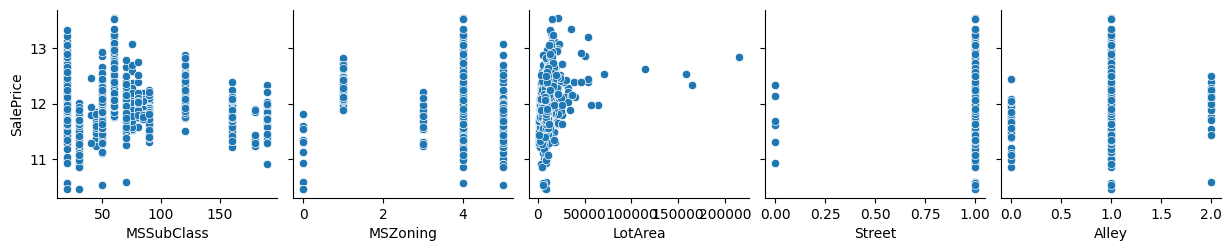

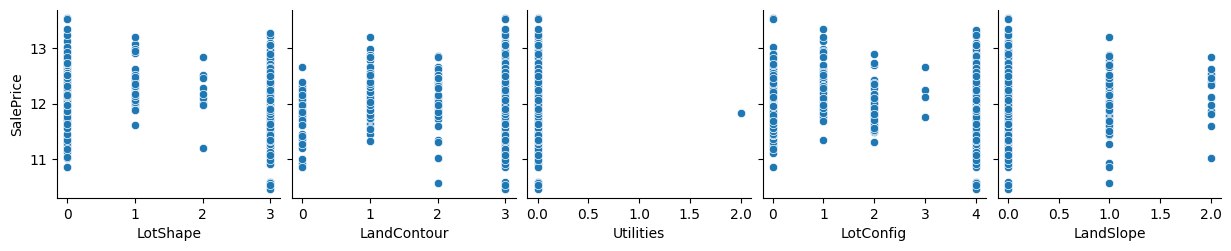

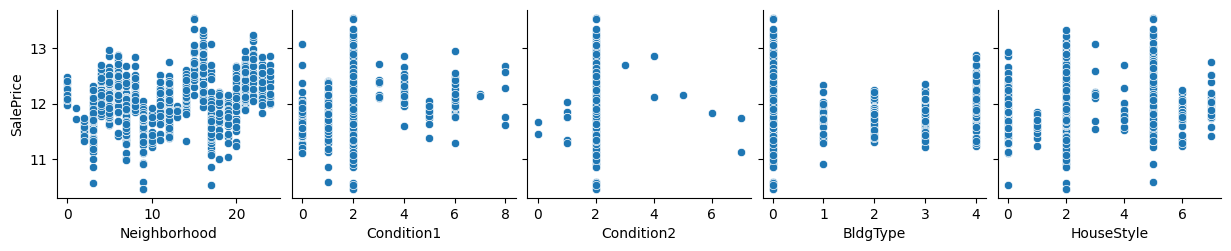

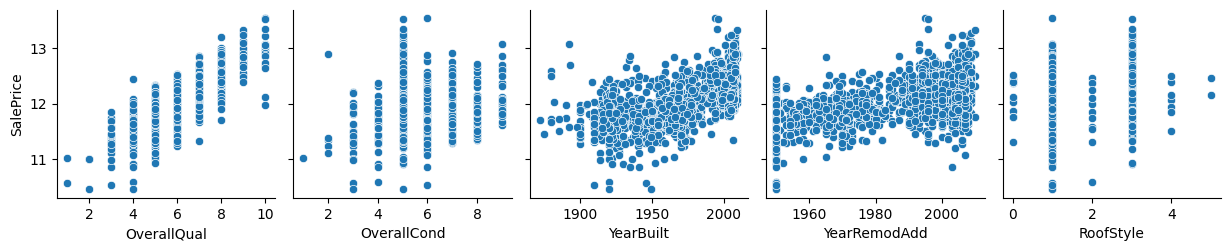

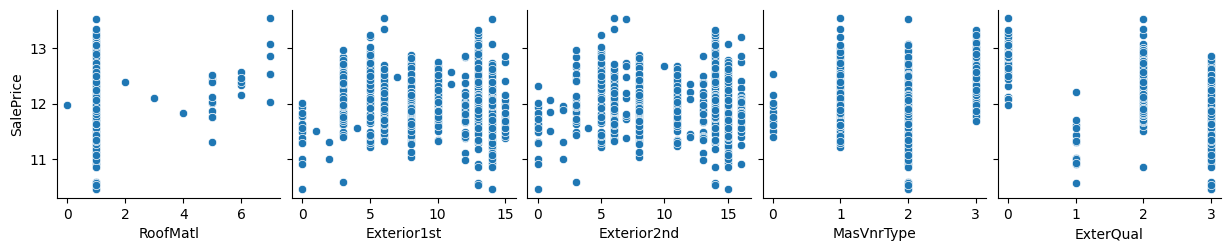

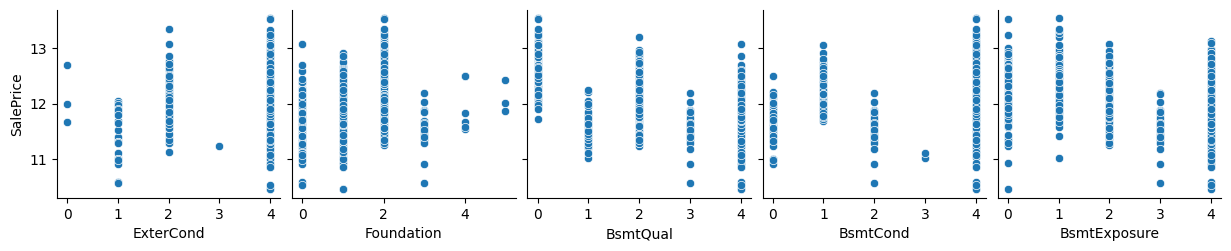

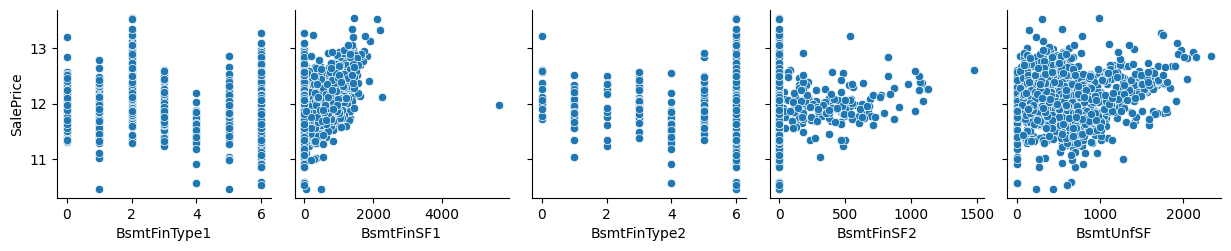

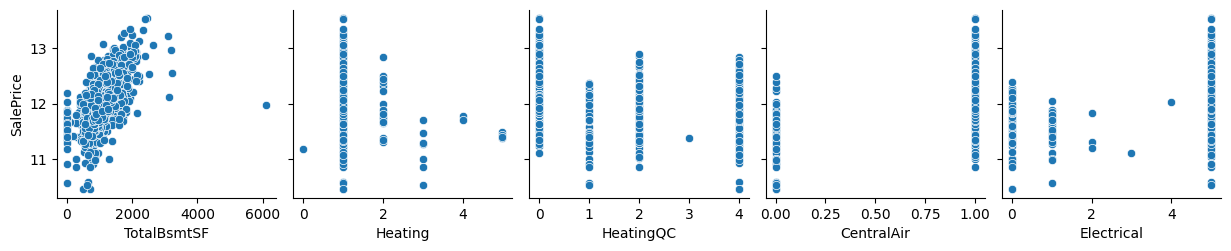

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'Feature1stFlrSF', 'Feature2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [1]:
%run './DataProcessing.ipynb'

## Entrainement du modèle

### Connection avec SageMaker

In [2]:
import os
import sagemaker
from sagemaker import get_execution_role

sagemaker_session = sagemaker.Session()

role = get_execution_role()
region = sagemaker_session.boto_session.region_name

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold

import tensorflow.keras as kr 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

2024-07-30 15:02:43.076754: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 15:02:43.087268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 15:02:43.099120: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 15:02:43.102584: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 15:02:43.111255: I tensorflow/core/platform/cpu_feature_guar

In [4]:
# Print column data type
assert len(split_features_X_df) > 0
assert len(split_categ_y_df) > 0

assert len(valid_features_X_df) > 0
assert len(valid_categ_y_df) > 0



### Normalisation des données

In [ ]:
from numpy.random import seed
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import math


# Normalisation des données
numeric_features = split_features_X_df
numeric_features.describe().transpose()[['mean', 'std']]

def build_tensorflow_model(init='normal', display=False):
    frontage = np.array(numeric_features)
    frontage_normalizer = layers.Normalization(axis=None)
    frontage_normalizer.adapt(frontage)

    neuralnetwork_model = tf.keras.Sequential([
        tf.keras.Input(shape=(len(numeric_features.columns),)),
        frontage_normalizer,
        layers.Dense(len(numeric_features.columns), kernel_initializer=init, activation='relu'),
        layers.Dense(len(numeric_features.columns), kernel_initializer=init, activation='relu'),
        layers.Dense(units=1, kernel_initializer=init, activation='linear')
        ])
    neuralnetwork_model.compile(loss='mean_absolute_error',                                 
                                optimizer=kr.optimizers.Adam(),
                                metrics=[ 
                                        tf.keras.metrics.MeanSquaredError(),
                                        tf.keras.metrics.MeanAbsoluteError(),
                                        tf.keras.metrics.MeanAbsolutePercentageError(),
                                        tf.keras.metrics.CosineSimilarity(),
                                        tf.keras.metrics.RootMeanSquaredError(),
                                        tf.keras.metrics.AUC()
                                ]
)
    if display:
        neuralnetwork_model.summary()

    return neuralnetwork_model

print("Compile the model")

%time

                       
def cross_fold_evaluation():    
    print("Cross fold and evaluation")
    #kfold = KFold(n_splits=10)
    #results = cross_val_score(estimator, numeric_features, split_categ_y_df, cv=kfold)
    #print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

def estimate_best_batch_epochs():
    
    estimator = KerasRegressor(model=build_tensorflow_model,verbose=0)        
    batch_size = [5, 10, 20, 40, 60, 80, 100]
    epochs = [10, 50, 100,150, 200]
    param_grid = dict(batch_size=batch_size, epochs=epochs)
    grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1, cv=5, scoring='r2')
    grid_result = grid.fit(numeric_features, split_categ_y_df)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid

print("Compiling the model")

tensorflow_model = build_tensorflow_model(display=True)

print("Crossfold validation")
estimators = []
#estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=tensorflow_model, epochs=200, batch_size=5, verbose=0, validation_split=0.2)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=4909, shuffle=True)
results = cross_val_score(pipeline, numeric_features, split_categ_y_df, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print("RMSE", math.sqrt(results.std()))




Compile the model
CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 8.82 μs
Compiling the model


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_11                │ (None, 88)             │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 88)             │         7,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 88)             │         7,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            89 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,756 (61.55 KB)

 Trainable params: 15,753 (61.54 KB)

 Non-trainable params: 3 (16.00 B)

Crossfold validation


/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.10/site-packages/

In [15]:
print("Fitting the model")

history = pipeline.fit(
    numeric_features, 
    split_categ_y_df)
#my_history = history.model.history
print("Model has been fit")

#history = estimate_best_batch_epochs()

#print("Expected", split_categ_y_df, "Prediction", estimator.predict(numeric_features))


Fitting the model
Model has been fit


## Accuracy metrics

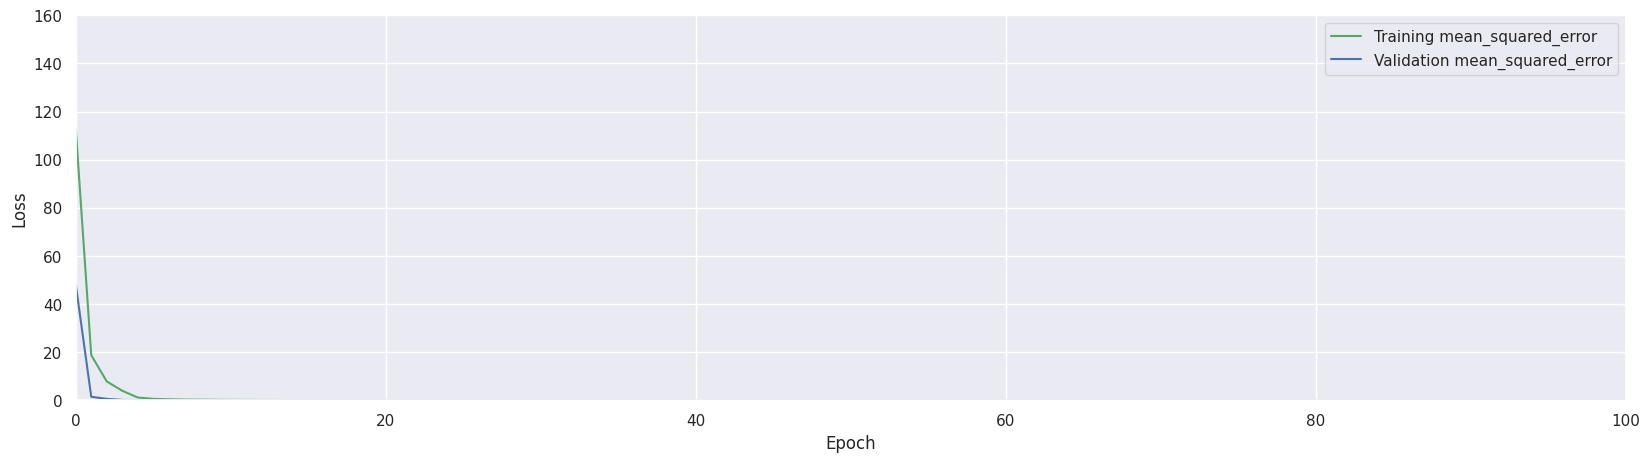

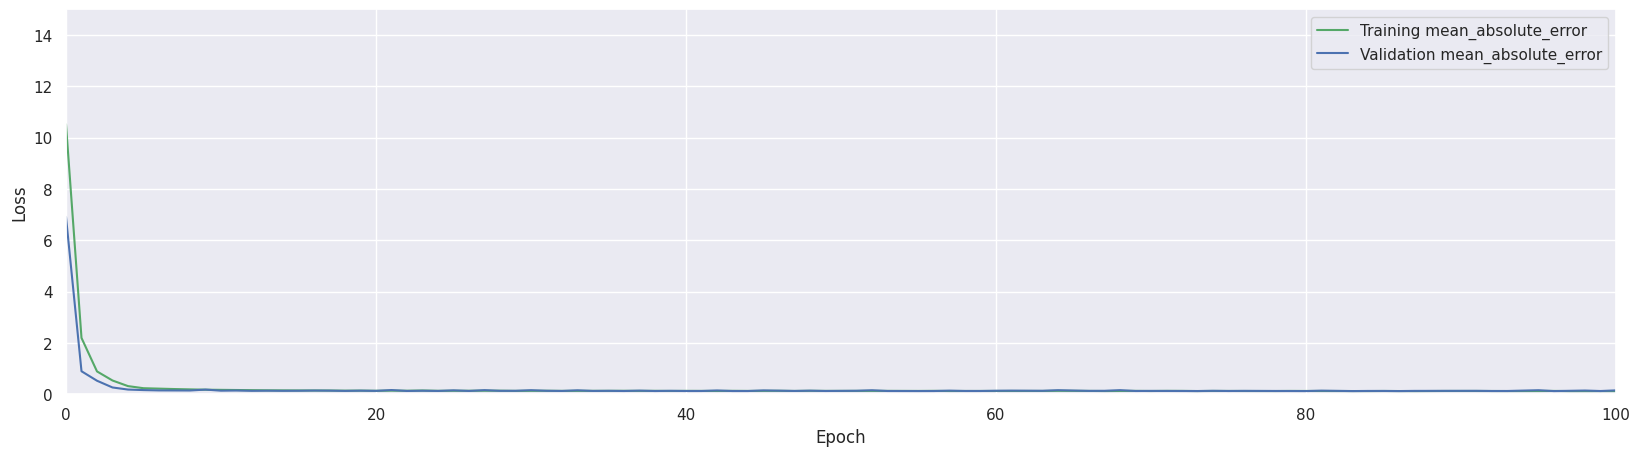

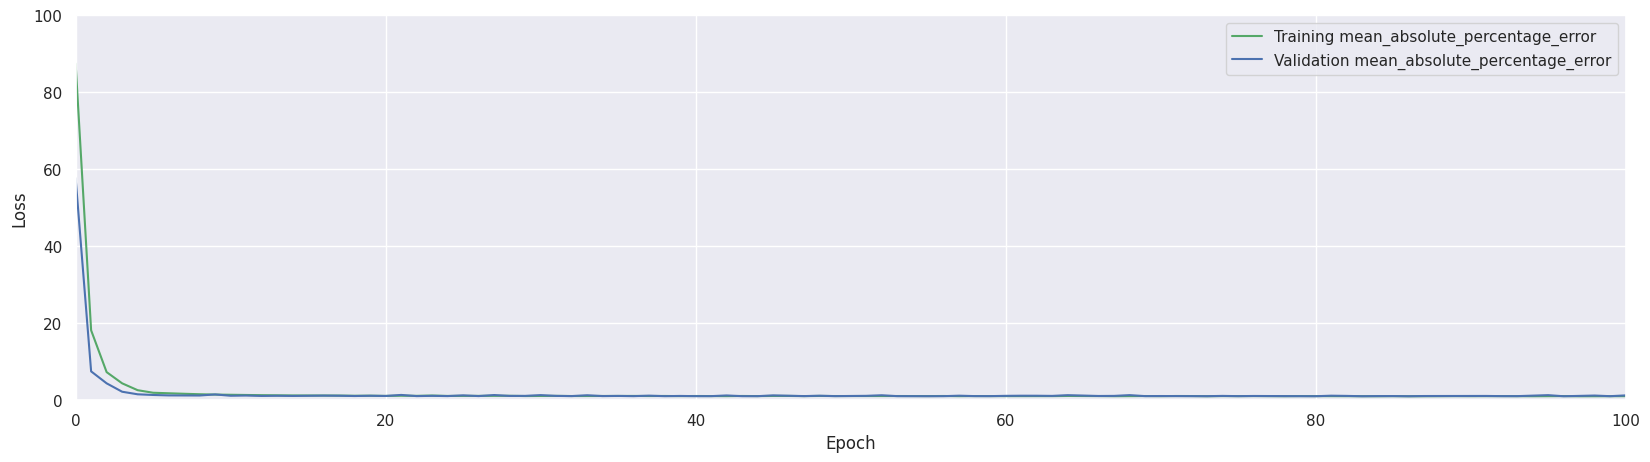

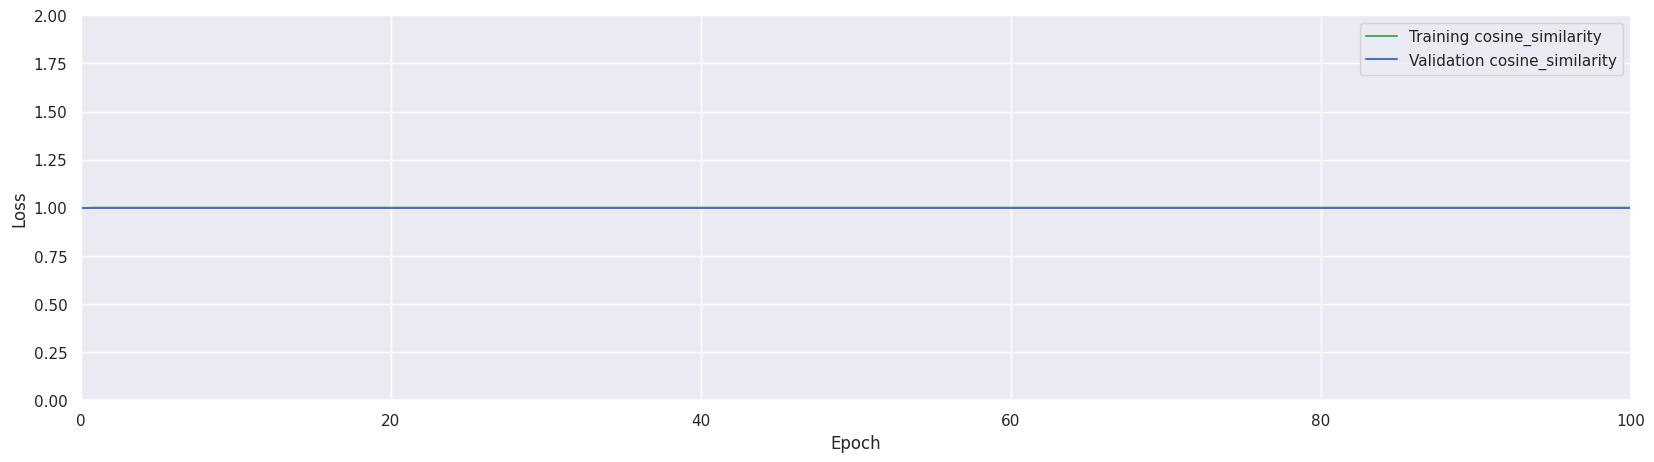

In [16]:
my_history= history['mlp'].model.history

def plot_loss(history, metric, max):
    plt.figure(figsize=(20,5))
    plt.plot(history.history[metric], 'g', label='Training ' + metric)
    plt.plot(history.history['val_'+ metric], 'b', label='Validation '+ metric)
    plt.xlim([0, 100])
    plt.ylim([0, max])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_loss(my_history, 'mean_squared_error', 160)
plot_loss(my_history, 'mean_absolute_error', 15)
plot_loss(my_history, 'mean_absolute_percentage_error', 100)
plot_loss(my_history, 'cosine_similarity', 2)


In [17]:
def check_prediction(estimator, valid_features_X_df, valid_categ_y_df):
    ## Compute Accuracys
    y_pred = estimator.predict(valid_features_X_df)
    y_test = valid_categ_y_df
    # The coefficients
    #print("Coefficients: \n", model.coef_)
    # The mean squared error
    print("root_mean_squared_log_error: %.2f" % root_mean_squared_log_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    print("Coefficient of determination / r2score: %.2f" % r2)
    #print(f1_score(y_test, y_pred, average="macro"))
    return r2

check_prediction(pipeline, valid_features_X_df, valid_categ_y_df)

root_mean_squared_log_error: 0.02
Coefficient of determination / r2score: 0.51


0.5140023231506348

### Test prediction Neural Network

### Export et prédiction vers Kaggle

In [19]:
test_normalized_retained_X = test_norm_X_df
house_y_pred = pipeline.predict(test_normalized_retained_X)
# Add predictions to the DataFrame
test['SalePrice'] = np.exp(house_y_pred)

submission_df = test[['Id', 'SalePrice']]  # Adjust column names as needed
submission_df.to_csv('submission2.csv', index=False)


## Graph et evaluation de la précision

root_mean_squared_log_error: 0.02
Coefficient of determination: 0.51


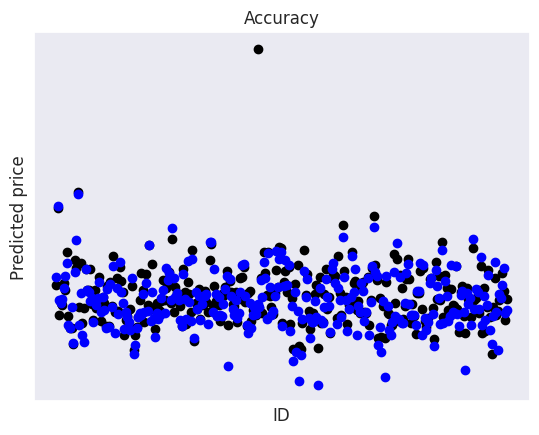

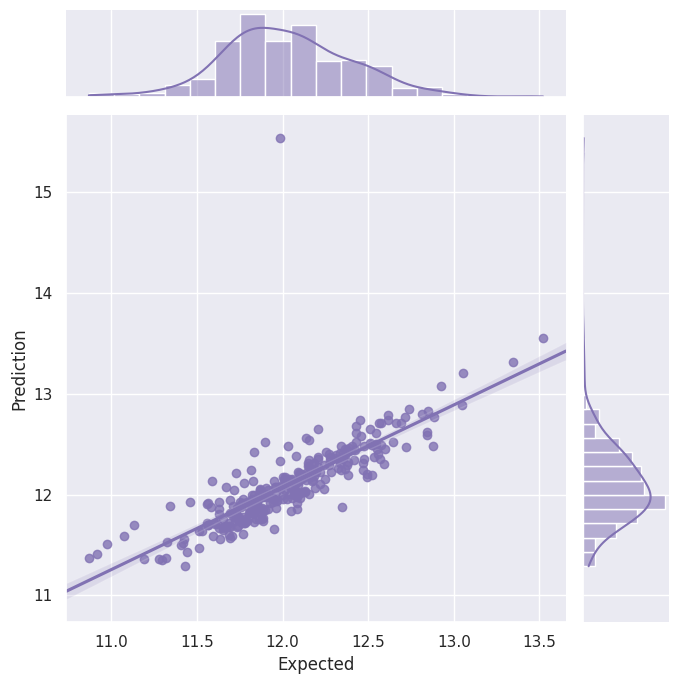

In [20]:
## Compute Accuracy
y_pred = pipeline.predict(valid_features_X_df)
y_test = valid_categ_y_df
    

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("root_mean_squared_log_error: %.2f" % root_mean_squared_log_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(valid_features_X_df.index, y_pred, color="black")
plt.scatter(valid_features_X_df.index, y_test, color="blue")
#plt.scatter(train["Id"], y_test, color="blue")
#plt.plot(test_features_X_df,  test_predicted_Y_df, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.tick_params(axis='both', labelsize=12, width=2, length=5)  # Style

plt.xlabel('ID')
plt.ylabel('Predicted price')
plt.title('Accuracy')
plt.show()


sns.set_theme(style="darkgrid")

data = valid_features_X_df.copy()
data["Prediction" ] = y_pred
data["Expected" ] = y_test
data["id"] = data.index
g = sns.jointplot(x="Expected", y="Prediction", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)
